## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from logistic_regression import LogisticRegression

##  Creating and visualizing multi-class data

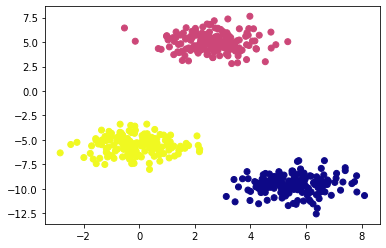

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=10)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.show()

## One vs. One

In One-vs-One classification, for the **N-class** instances dataset, we have to generate the **N(N-1)/2** binary classifier models. Using this classification approach, we split the primary dataset into one dataset for each class opposite to every other class.

Taking the above example, we have a classification problem having three types: **Pink**, **Yellow**, and **Blue** (**N=3**).

We divide this problem into **N*(N-1)/2 = 3** binary classifier problems:
- **Classifier 1:** Pink vs. Blue
- **Classifier 2:** Yellow vs. Blue
- **Classifier 3:** Pink vs. Yellow

### -  Classifier 1

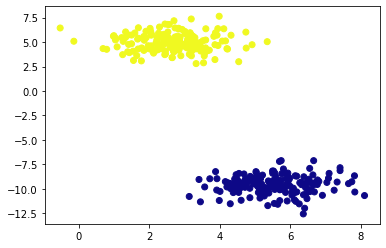

In [3]:
X1 = []
y1 = []
for i in range(len(X)):
    if y[i] == 0 or y[i] == 1:
        X1.append(X[i])
        y1.append(y[i])
X1 = np.array(X1)
y1 = np.array(y1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='plasma')
plt.show()

In [4]:
lg = LogisticRegression()
losses = lg.fit(X1, y1)

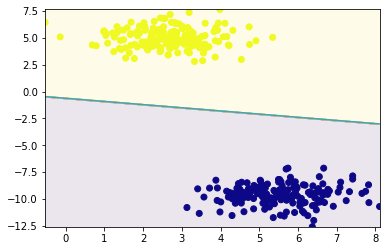

In [5]:
xx = np.linspace(X1[:, 0].min(), X1[:, 0].max(), 1000)
yy = np.linspace(X1[:, 1].min(), X1[:, 1].max(), 1000)
xx, yy = np.meshgrid(xx, yy)
x = np.vstack((xx.ravel(), yy.ravel())).T
z = lg.predict(x)
zz = z.reshape(xx.shape)
fig, axes = plt.subplots()
axes.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='plasma')
axes.pcolormesh(xx, yy, zz, zorder=0, alpha=0.1, shading='auto')
axes.contour(xx, yy, zz, cmap=plt.cm.Spectral)
plt.show()

### - Classifier 2

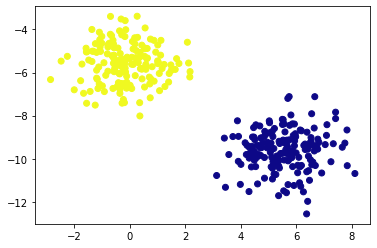

In [6]:
X2 = []
y2 = []
for i in range(len(X)):
    if y[i] == 0 :
        X2.append(X[i])
        y2.append(0)
    if y[i] == 2:
        X2.append(X[i])
        y2.append(1)
X2 = np.array(X2)
y2 = np.array(y2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='plasma')
plt.show()

In [7]:
lg = LogisticRegression()
losses = lg.fit(X2, y2)

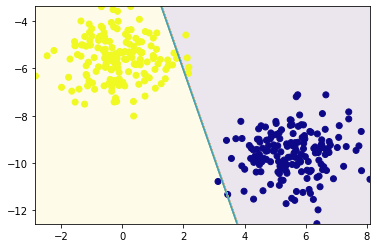

In [8]:
xx = np.linspace(X2[:, 0].min(), X2[:, 0].max(), 1000)
yy = np.linspace(X2[:, 1].min(), X2[:, 1].max(), 1000)
xx, yy = np.meshgrid(xx, yy)
x = np.vstack((xx.ravel(), yy.ravel())).T
z = lg.predict(x)
zz = z.reshape(xx.shape)
fig, axes = plt.subplots()
axes.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='plasma')
axes.pcolormesh(xx, yy, zz, zorder=0, alpha=0.1, shading='auto')
axes.contour(xx, yy, zz, cmap=plt.cm.Spectral)
plt.show()

### - Classifier 3

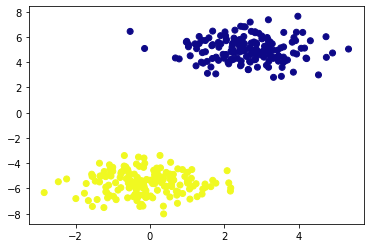

In [9]:
X3 = []
y3 = []
for i in range(len(X)):
    if y[i] == 1 :
        X3.append(X[i])
        y3.append(0)
    if y[i] == 2:
        X3.append(X[i])
        y3.append(1)
X3 = np.array(X3)
y3 = np.array(y3)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='plasma')
plt.show()

In [10]:
lg = LogisticRegression()
losses = lg.fit(X3, y3)

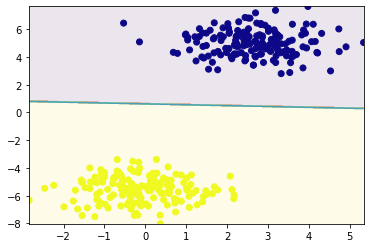

In [11]:
xx = np.linspace(X3[:, 0].min(), X3[:, 0].max(), 1000)
yy = np.linspace(X3[:, 1].min(), X3[:, 1].max(), 1000)
xx, yy = np.meshgrid(xx, yy)
x = np.vstack((xx.ravel(), yy.ravel())).T
z = lg.predict(x)
zz = z.reshape(xx.shape)
fig, axes = plt.subplots()
axes.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='plasma')
axes.pcolormesh(xx, yy, zz, zorder=0, alpha=0.1, shading='auto')
axes.contour(xx, yy, zz, cmap=plt.cm.Spectral)
plt.show()

## One vs. All

n one-vs-All classification, for the **N-class** instances dataset, we have to generate the **N-binary classifier** models. The number of class labels present in the dataset and the number of generated binary classifiers must be the same.

Taking the above example, we have a classification problem having three types: **Pink**, **Yellow**, and **Blue** (**N=3**).

Now, as I told you earlier that we have to generate the same number of classifiers as the class labels are present in the dataset, So we have to create three classifiers here for three respective classes:
- **Classifier 1:** Blue vs. [Pink, Yellow]
- **Classifier 2:** Pink vs. [Blue, Yellow]
- **Classifier 3:** Yellow vs. [Blue, Pink]

### - Classifier 1

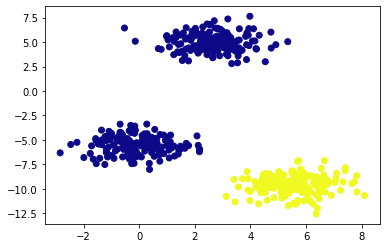

In [12]:
y1 = np.zeros(y.shape)
for i in range(len(y)):
    if y[i] == 0:
        y1[i] = 1
    else :
        y1[i] = 0
plt.scatter(X[:,0], X[:, 1], c=y1, cmap='plasma')
plt.show()

In [13]:
lg = LogisticRegression()
losses = lg.fit(X, y1)

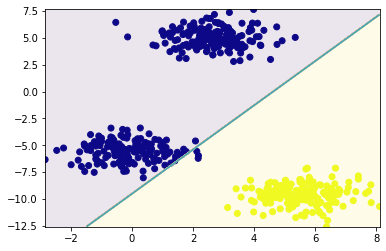

In [14]:
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
xx, yy = np.meshgrid(xx, yy)
x = np.vstack((xx.ravel(), yy.ravel())).T
z = lg.predict(x)
zz = z.reshape(xx.shape)
fig, axes = plt.subplots()
axes.scatter(X[:, 0], X[:, 1], c=y1, cmap='plasma')
axes.pcolormesh(xx, yy, zz, zorder=0, alpha=0.1, shading='auto')
axes.contour(xx, yy, zz, cmap=plt.cm.Spectral)
plt.show()

### - Classifier 2

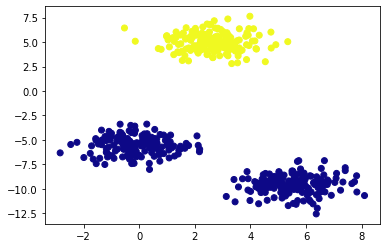

In [15]:
y2 = np.zeros(y.shape)
for i in range(len(y)):
    if y[i] == 1:
        y2[i] = 1
    else :
        y2[i] = 0
plt.scatter(X[:,0], X[:, 1], c=y2, cmap='plasma');

In [16]:
lg = LogisticRegression()
losses = lg.fit(X, y2)

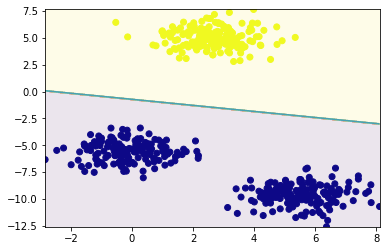

In [17]:
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
xx, yy = np.meshgrid(xx, yy)
x = np.vstack((xx.ravel(), yy.ravel())).T
z = lg.predict(x)
zz = z.reshape(xx.shape)
fig, axes = plt.subplots()
axes.scatter(X[:, 0], X[:, 1], c=y2, cmap='plasma')
axes.pcolormesh(xx, yy, zz, zorder=0, alpha=0.1, shading='auto')
axes.contour(xx, yy, zz, cmap=plt.cm.Spectral)
plt.show()

### - Classifier 3

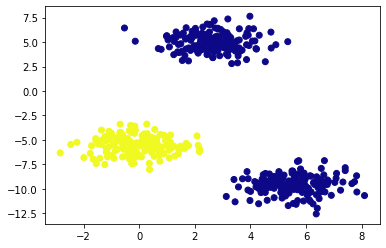

In [18]:
y3 = np.zeros(y.shape)
for i in range(len(y)):
    if y[i] == 2:
        y3[i] = 1
    else :
        y3[i] = 0
plt.scatter(X[:,0], X[:, 1], c=y3, cmap='plasma')
plt.show()

In [19]:
lg = LogisticRegression()
losses = lg.fit(X, y3)

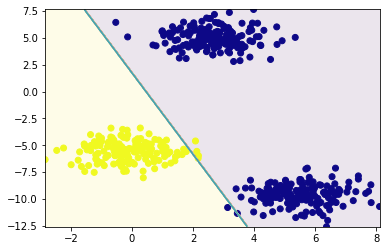

In [20]:
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
xx, yy = np.meshgrid(xx, yy)
x = np.vstack((xx.ravel(), yy.ravel())).T
z = lg.predict(x)
zz = z.reshape(xx.shape)
fig, axes = plt.subplots()
axes.scatter(X[:, 0], X[:, 1], c=y3, cmap='plasma')
axes.pcolormesh(xx, yy, zz, zorder=0, alpha=0.1, shading='auto')
axes.contour(xx, yy, zz, cmap=plt.cm.Spectral)
plt.show()